# DSC540 Project 1

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

In [1]:
import sklearn
sklearn.__version__

'0.23.1'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### Daniel O'Brien

**Honor Pledge:**  
I pledge on my honor that I, **Daniel O'Brien**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [5]:
# Load the dataset from UCI
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Since this dataset does not have headers, we will read the data file that I have created.
- Last column is the target column.
- The ID column is dropped.

In [7]:
df = pd.read_csv('WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Question 1 [5 points]
How many people have cancer?

> Hint: Should be less than 300!

In [10]:
count = df['target'].value_counts()
count

0    357
1    212
Name: target, dtype: int64

### How many people have cancer?
#### There are 212 people who have cancer. I found this by pulling the counts of the distinct values of the target column. We can also see that there are 357 people who do not have cancer.

### Question 2 [5 points]
Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [11]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

### Data Types
#### There are no categorical data types in this dataframe, with the exception of the target variable in which 1 represents person who have cancer and 0 represents persons who do not have cancer. Almost all of the columns are floats, the expection is the target variable, which is an int. 

In [12]:
df.isnull().values.any()

False

### Missing Values
#### The code above shows that there are not any null values in the dataframe. The code below shows that each column has a total of 0 null values.

In [13]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [14]:
df.shape

(569, 31)

### How many observations?
#### There are 569 observations as can be seen above when the shape of the dataframe is pulled.

In [15]:
X.shape

(569, 30)

### How many variables in the feature set, X?
#### There are 30 variables in the feature set, X. This can be seen by examining the shape of the X dataframe, we are specifically looking are the y variables, because for our dataframe, each row represents a person or observation and each column represents a variable. 

### Question 3 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [16]:
pd.set_option("display.max_columns", None)

In [17]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Do the variables have values close to each other, or is there a large difference?
#### We can examine whether variables have values close to each other or is there is a large distance between the values of a specific variable by examining the minimum values, maximum values, and range of the data. We can see that some columns have a very small range, where this is not a big difference between values, such as mean smoothness, mean compactness, mean concavity, mean concave points and mean symmetry all have ranges less than 1, with minimum and maximum values between 0 and 1. There are also rows with much large ranges and much greater differences between values, such as mean area (max = 2501, min = 143.5, range = 2357.5), area error (max=543.2, min=6.802, range=536.398) and worst area (max=4254, min=185.2, range=4068.8). This can cause issued by misleading the models into thinking the larger values are more important. 

### Variable with the largest value
#### The variable with the largest value is 'Worst Area' with a maximum value of 4254

### Variable with the smallest value
#### The smallest value found in the dataframe is 0. There are several variables that included a minimum value of 0, they are 'Mean Concavity', 'Mean Concave Points', 'Concavity Error', 'Concave Points Error', and 'Worst Concavity'.

### Question 4 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [18]:
X.corr(method='pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Highly Correlated Variables
#### There are many cases of highly correlated variables. One example included the variables that measure the dimensions of the masses. Mean Radius, Mean Perimeter and Mean Area all have high positive correlations with each other, above 0.9. I suspect that these variables are are highly correlated because radius, perimeter and area are all ways to measure the size of something, so if the subject of the measurement is larger, the values of the aforementioned variables will be higher. 
#### Another example of highly correlated variables are mean concave points and mean concavity. These have a high positive correlation of 0.92. These both appear to be measuring a similar thing both related to the concavity of the subject, so it makes sense that they are highly correlated.
#### Among others, mean compactness also shared fairly high correlations with a few other variables. The correlation between mean compactness and mean concavity is 0.88. This shows that there is some relationship between compactness and concavity. Additionally, the correlation between mean concavity and worst concavity is 0.88, this is probably because the higher the worst concavity the higher the mean concavity.

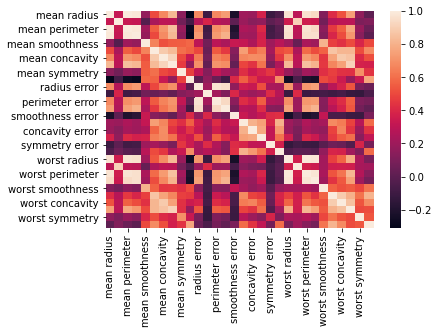

In [19]:
sns.heatmap(X.corr())

### Question 5 [5 points]
**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [20]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [21]:
y_train.value_counts()

0    267
1    159
Name: target, dtype: int64

In [22]:
y_test.value_counts()

0    90
1    53
Name: target, dtype: int64

In [23]:
prop1 = 159 / (159 + 267)
prop1

0.3732394366197183

In [24]:
prop2 = 53 / (53 + 90)
prop2

0.3706293706293706

### Proportions of cancer classes
#### In the training dataset, approximately 37% of people have cancer and in the testing set approximately 37% of people have cancer. The proportion of cancer cases in both the training and testing sets are very similar. 

### Importance of stratified sampling.
#### Stratified sampling is important because it gives each subset a proportional amount of samples from each class. Without stratified sampling, we could end up with either our training or testing set with significantly more people with cancer and this could lead to out analysis being inaccurate or misleading. 

### Question 6 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
#clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)

In [27]:
#pred = clf.predict(X_train)
#metrics.accuracy_score(y_true = y_train, y_pred = pred)

In [28]:
#pred = clf.predict(X_test)
#metrics.accuracy_score(y_true = y_test, y_pred = pred)

In [29]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1).fit(X_train, y_train)

In [30]:
pred = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9413145539906104

In [31]:
pred = clf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.986013986013986

### Training and Testing Accuracy
#### The training accuracy for this model is 0.94 and the testing accuracy is 0.986.

In [32]:
confusion_matrix(y_test, pred)

array([[89,  1],
       [ 1, 52]])

### Recall

In [33]:
sklearn.metrics.recall_score(y_true = y_test, y_pred = pred)

0.9811320754716981

#### TP/(TP + FN)
#### The Recall value is 0.98. This can be found by dividing the number of true positives (52) by the true positives plus false negatives (52+1)

### Specificity

In [34]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred).ravel()
specificity = tn / (tn+fp)
specificity

0.9888888888888889

In [35]:
89/(89+1)

0.9888888888888889

#### TN/(TN+FP)
#### The specificity value is 0.99. This can be cound by dividing the true negatives (89) by the true negatives plus the false positives (89+1)

### Precision

In [36]:
metrics.precision_score(y_true = y_test, y_pred = pred)

0.9811320754716981

#### TP/(TP+FP)
#### The precision is 0.98. This can be found by dividing the true positives (52) by the true positives plus the false positives (52+1)

### False Positive Rate

In [37]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred).ravel()
FPRate = fp / (fp+tn)
FPRate

0.011111111111111112

#### FP/Actual No
#### There is a false positive rate of 0.01. This can be found by dividing the number of false positives by the actual no value.

### F1 Score

In [38]:
sklearn.metrics.f1_score(y_true = y_test, y_pred = pred)

0.9811320754716981

#### 2 x (Precision * Recall)/(Precision + Recall)
#### The F1 score is 0.98, and this is found by multiplying 2 times the quotient of the product of precision and recall by the sum of precision and recall.

### Question 7 [10 points]

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [39]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
KNNpred = neigh.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = KNNpred)

1.0

In [41]:
TestPred = neigh.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = TestPred)

0.9440559440559441

### Training and Testing Accuracy Scores
#### The training set returned an accuracy of 1 and the testing set returned an accuracy of 0.94

In [42]:
confusion_matrix(y_test, TestPred)

array([[86,  4],
       [ 4, 49]])

In [43]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = TestPred).ravel()

### Recall (Sensitivity)

In [44]:
metrics.recall_score(y_true = y_test, y_pred = TestPred)

0.9245283018867925

#### The KNN classifer returned a recall value of 0.92. This is found by dividing the true positive value by the sum of the true positive and false negative values.

### Specificity

In [45]:
specificity = tn / (tn+fp)
specificity

0.9555555555555556

#### The KNN classifier returned a specificity value of 0.96. Specificity is found by dividing the true negative value by the sum of the true negative and false positive values.

### Precision

In [46]:
metrics.precision_score(y_true = y_test, y_pred = TestPred)

0.9245283018867925

#### The precision score for the KNN classifier is 0.92. Precision is found by dividing the true positive value by the sum of the true positive and false positive values.

### F1 Score

In [47]:
sklearn.metrics.f1_score(y_true = y_test, y_pred = TestPred)

0.9245283018867925

#### The F1 Score for the KNN classifier is 0.92.

### Question 8 [10 points]

- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [48]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [49]:
pred = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9366197183098591

In [50]:
TestPred = clf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = TestPred)

0.958041958041958

#### The training accuracy returned a score of 0.94 and the testing accuracy returned a score of 0.96.

### Confusion Matrix

In [51]:
confusion_matrix(y_test, TestPred)

array([[89,  1],
       [ 5, 48]])

In [52]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = TestPred).ravel()

### Recall (Sensitivity)

In [53]:
metrics.recall_score(y_true = y_test, y_pred = TestPred)

0.9056603773584906

#### The recall score from the Gaussian Naive Bayes Classifier returned a score of 0.91.

### Specificity

In [54]:
specificity = tn / (tn+fp)
specificity

0.9888888888888889

#### The specificity for the classifier returned a value of 0.99

### Precision

In [55]:
metrics.precision_score(y_true = y_test, y_pred = TestPred)

0.9795918367346939

#### The classifier returned a precision value of 0.98

### F1 Score

In [56]:
sklearn.metrics.f1_score(y_true = y_test, y_pred = TestPred)

0.9411764705882353

In [57]:
print(metrics.classification_report(y_true = y_test, y_pred = TestPred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



#### The classifier returned a F1 Score of 0.94.

### Question 9 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [58]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train, y_train)
    predTrain = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = predTrain))
    predTest = clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = predTest))

In [59]:
accuracy_train

[0.9248826291079812,
 0.931924882629108,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347,
 0.9413145539906104,
 0.9413145539906104,
 0.9460093896713615,
 0.9483568075117371,
 0.9507042253521126,
 0.9624413145539906,
 0.971830985915493,
 0.9765258215962441,
 0.9859154929577465,
 0.9882629107981221,
 0.9859154929577465,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221]

In [60]:
accuracy_test

[0.9370629370629371,
 0.958041958041958,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.972027972027972,
 0.9790209790209791]

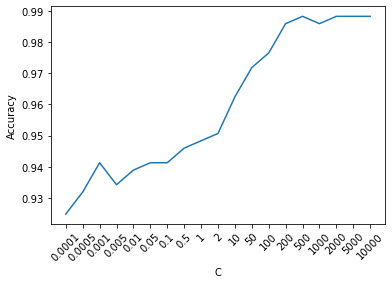

In [61]:
plt.plot(accuracy_train)
plt.xticks(np.arange(len(C_list)), C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

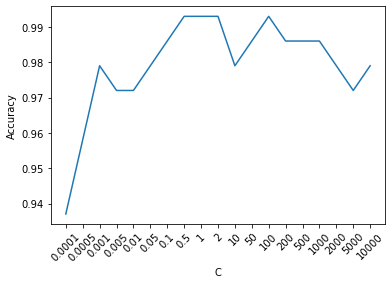

In [62]:
plt.plot(accuracy_test)
plt.xticks(np.arange(len(C_list)), C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

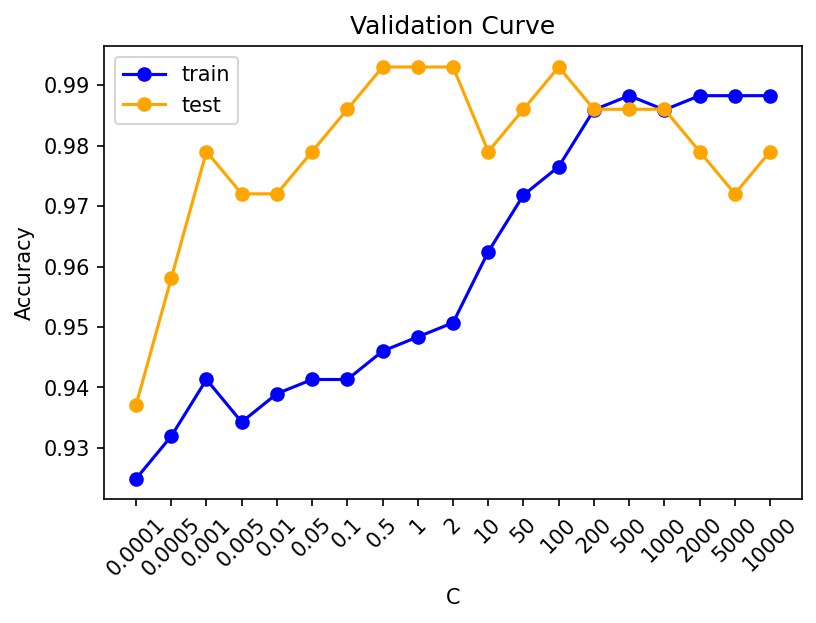

In [63]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='train')
plt.plot(accuracy_test, marker='o', color='orange', label='test')
plt.title("Validation Curve")
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list, rotation = 45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Validation Curves
#### I first plotted both the training and testing set together, but to make the differences more clear, I also plotted them separately.

### Question 10 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [64]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    TrainPred = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = TrainPred))
    TestPred = clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = TestPred))

In [65]:
accuracy_train

[1.0,
 0.9483568075117371,
 0.9460093896713615,
 0.9389671361502347,
 0.931924882629108,
 0.9248826291079812,
 0.9272300469483568,
 0.9248826291079812,
 0.9225352112676056,
 0.9225352112676056,
 0.9225352112676056,
 0.9131455399061033,
 0.9084507042253521,
 0.9014084507042254]

In [66]:
accuracy_test

[0.9440559440559441,
 0.965034965034965,
 0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.9440559440559441,
 0.9440559440559441,
 0.9370629370629371,
 0.9370629370629371,
 0.9370629370629371,
 0.9300699300699301,
 0.9230769230769231,
 0.9300699300699301,
 0.9090909090909091]

### Validation Curves
#### All curves made using Matplotlib. I first plotted both curves together and then plotted the curves separately

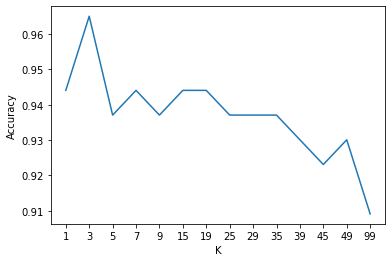

In [67]:
plt.plot(accuracy_test)
plt.xticks(np.arange(len(K_list)), K_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

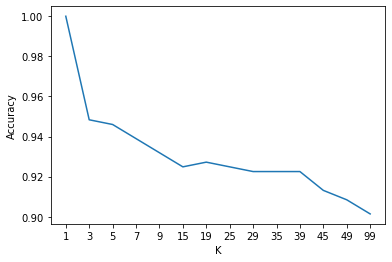

In [68]:
plt.plot(accuracy_train)
plt.xticks(np.arange(len(K_list)), K_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

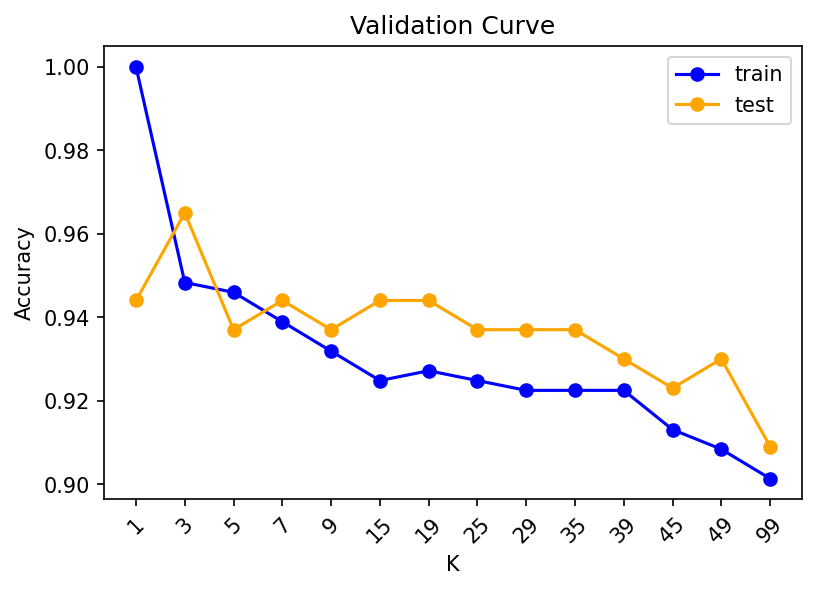

In [69]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='train')
plt.plot(accuracy_test, marker='o', color='orange', label='test')
plt.title("Validation Curve")
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation = 45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 11 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data and re-do Quesion 9 and plot the validation curve for logistic regression models with same parameter range for C. 
- Plot the validation curve. What do you see? 
- Which value would you choose for C in logistic regression? Why?

In [70]:
from sklearn import preprocessing

In [71]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [72]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train_ss, y_train)
    predTrain = clf.predict(X_train_ss)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = predTrain))
    predTest = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = predTest))

In [73]:
accuracy_train

[0.6455399061032864,
 0.8356807511737089,
 0.8849765258215962,
 0.9460093896713615,
 0.9483568075117371,
 0.9788732394366197,
 0.9835680751173709,
 0.9906103286384976,
 0.9906103286384976,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9953051643192489,
 0.9976525821596244,
 0.9976525821596244,
 1.0,
 1.0,
 1.0]

In [74]:
accuracy_test

[0.6363636363636364,
 0.8671328671328671,
 0.9300699300699301,
 0.965034965034965,
 0.965034965034965,
 0.9790209790209791,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.9790209790209791,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965]

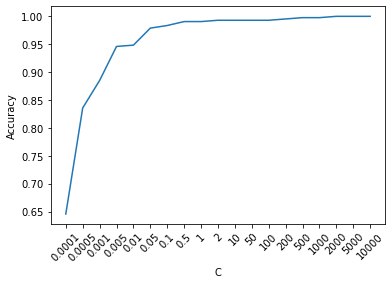

In [75]:
plt.plot(accuracy_train)
plt.xticks(np.arange(len(C_list)), C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

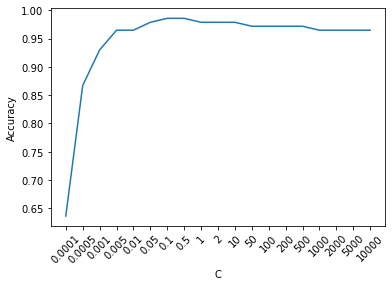

In [76]:
plt.plot(accuracy_test)
plt.xticks(np.arange(len(C_list)), C_list, rotation = 45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

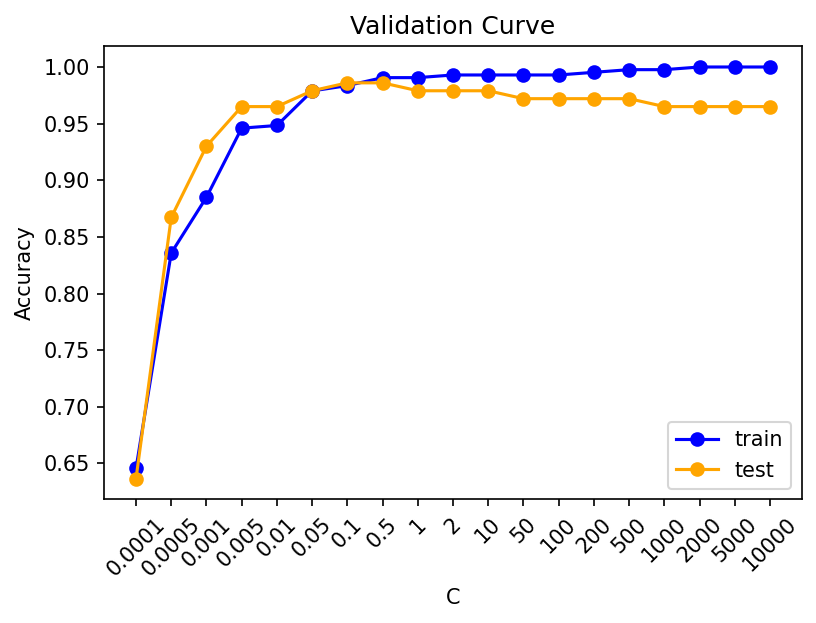

In [77]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='train')
plt.plot(accuracy_test, marker='o', color='orange', label='test')
plt.title("Validation Curve")
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list, rotation = 45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Validation Curves
#### After plotting the validation curve for the normalized data, it appears to have a more interpretable shape. Based on both the curve for the training and testing accuracy, I would choose a C value of 0.5. I would choose a C value of 0.5, because that is the point where the training and testing data seem to be at a peak. Before 0.5, the testing score is lower and after 0.5 the training score decreases.

### Question 12 [5 points]

In [78]:
X_train_ss.shape

(426, 30)

In [79]:
X_train_ss[0:426,:].shape

(426, 30)

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value, and the other parameters the same as before.
- Starting from 1 data point in the training set, increase your training set size by 1 point in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [80]:
X_train_ss.shape

(426, 30)

In [81]:
accuracy_train = []
accuracy_test = []
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.5)

num_points = list(range(2, X_train_ss.shape[0], 1))

for n in num_points:
    clf.fit(X_train_ss[0:n, :], y_train[0:n])
    pred_train = clf.predict(X_train_ss[0:n, :])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_train))
    pred_test = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test))


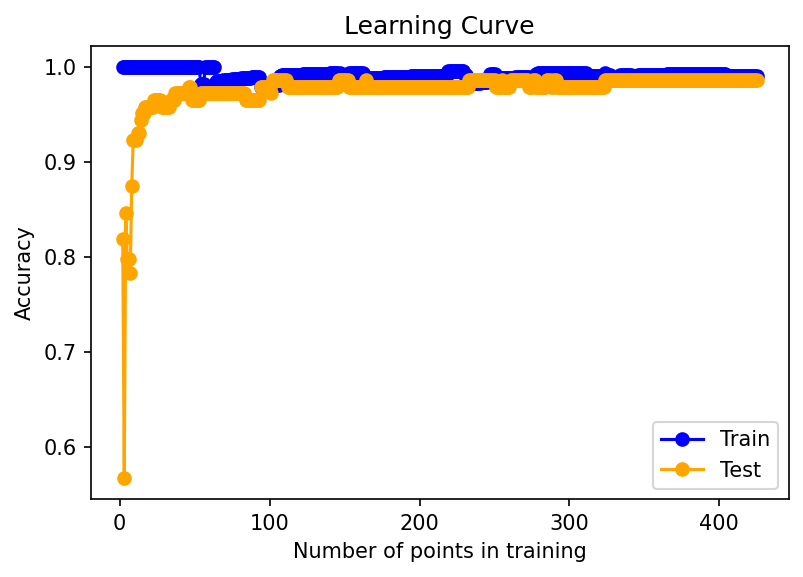

In [82]:
f, ax = plt.subplots(dpi=150)
ax.plot(num_points, accuracy_train, marker='o', color='blue', label='Train')
ax.plot(num_points, accuracy_test, marker='o', color='orange', label='Test')
ax.set_xlabel('Number of points in training')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
# ax.set_xticks(np.arange(len(num_points)))
# ax.set_xticklabels(num_points, rotation=90)
ax.legend();


#### Due to the number of points and gradually introducing one new point at a time, this graph is a little difficult to read. But we can see that as more points are introduced, the accuracy of the testing set increases. At first the testing accuracy is very low and then somewhere around 20 points, we can see the testing set increase quite a bit.

### Question 13 [5 points]

- Before applying KNN, it is important to scale the features. 
- Use the standardized train and test sets re-do Quesion 10 and plot the validation curve for KNN models with same parameter range for K. 
- Plot the validation curve. What do you see? 
- Which value would you choose for K in nearest neighbor model?

In [83]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_ss, y_train)
    TrainPred = clf.predict(X_train_ss)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = TrainPred))
    TestPred = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = TestPred))

In [84]:
accuracy_train

[1.0,
 0.9835680751173709,
 0.9788732394366197,
 0.971830985915493,
 0.971830985915493,
 0.9577464788732394,
 0.960093896713615,
 0.9530516431924883,
 0.9483568075117371,
 0.9530516431924883,
 0.9530516431924883,
 0.9460093896713615,
 0.9483568075117371,
 0.9248826291079812]

In [85]:
accuracy_test

[0.951048951048951,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.951048951048951]

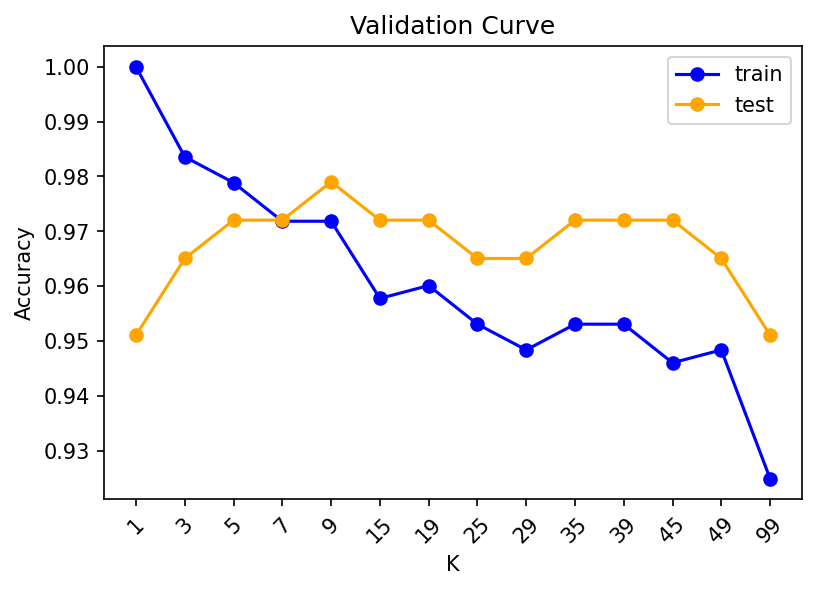

In [86]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='train')
plt.plot(accuracy_test, marker='o', color='orange', label='test')
plt.title("Validation Curve")
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation = 45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Nearest Neighbors with Scaled Features
#### After scaling the features, a different result is seen in the Validation Curve. I would select 7 or 9 as my value for K. I would choose 7 or 9, because before that point, the testing accuracy is lower and when more than 9 neighbors are included, the training accuracy decreases steadily.

### Question 14 [10 points]
- Using only the classifier models of logistic regression, Gaussian Naive Bayes, or KNN models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement one of the methods you proposed. 
    - Is the model accuracy increasing? Why do you think this might have helped?
    - If it not increasing, try the other method you proposed. Why do you think this might have helped?
    - If none of them did not improve, comment on why this might have been the case.
    - If you have time try a few more solutions and see which one works. 

### Logistic Regression
#### One way to improve the logistic regression model is to change the algorithm used in the regression, the logistic regression was using the 'lbfgs' algorithm, and changing the algorithm could see a change in the model. Another way to improve this model is to change the number of iterations for the model. Currently the number of iterations is set to 10000, increasing it to 20000 could see a change in the model.
#### First, I will run the model with everything the same as the first time, and then I will change the algorithm to 'newton-cg' and see if the results improve. If they do not, I will change the number of iterations and run the model again.

In [87]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.5).fit(X_train_ss, y_train)

In [88]:
predTrain = clf.predict(X_train_ss)
TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred=predTrain)
predTest = clf.predict(X_test_ss)
TestAcc = metrics.accuracy_score(y_true = y_test, y_pred = predTest)

In [89]:
print(TrainAcc)

0.9906103286384976


In [90]:
print(TestAcc)

0.986013986013986


In [91]:
clf = LogisticRegression(max_iter = 10000, solver='newton-cg', penalty='l2', C=0.5).fit(X_train_ss, y_train)

In [92]:
predTrain = clf.predict(X_train_ss)
TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred=predTrain)
predTest = clf.predict(X_test_ss)
TestAcc = metrics.accuracy_score(y_true = y_test, y_pred = predTest)

In [93]:
print(TrainAcc)

0.9906103286384976


In [94]:
print(TestAcc)

0.986013986013986


#### No improvement was seen by changing the algorthim, so I will change the number of iterations and try again.

In [95]:
clf = LogisticRegression(max_iter = 20000, solver='lbfgs', penalty='l2', C=0.5).fit(X_train_ss, y_train)

In [96]:
predTrain = clf.predict(X_train_ss)
TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred=predTrain)
predTest = clf.predict(X_test_ss)
TestAcc = metrics.accuracy_score(y_true = y_test, y_pred = predTest)

In [97]:
print(TrainAcc)

0.9906103286384976


In [98]:
print(TestAcc)

0.986013986013986


#### There was not any improvement seen by changing the number of iterations

### KNN
#### One way to improve the performance of the KNN model is by specifying an algorithm to use and another way to improve the KNN model is to by changing the p value which will dictate the distance measure used in the problem. I will run the model without any modifications first, and afterwards I will change the algorithm and see if there is any change, and if there is no change I will change the distance measure.

In [99]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train_ss, y_train)
TrainPred = clf.predict(X_train_ss)
TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred = TrainPred)
TestPred = clf.predict(X_test_ss)
TestAcc = metrics.accuracy_score(y_true = y_test, y_pred = TestPred)

In [100]:
print(TrainAcc)

0.971830985915493


In [101]:
print(TestAcc)

0.9790209790209791


In [102]:
clf = KNeighborsClassifier(n_neighbors=9, algorithm='brute')
clf.fit(X_train_ss, y_train)
TrainPred = clf.predict(X_train_ss)
TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred = TrainPred)
TestPred = clf.predict(X_test_ss)
TestAcc = metrics.accuracy_score(y_true = y_test, y_pred = TestPred)

In [103]:
print(TrainAcc)

0.971830985915493


In [104]:
print(TestAcc)

0.9790209790209791


#### Changing the algorithm to brute force did not result in a change, I will modify the distance measure used and observe the result.

In [105]:
clf = KNeighborsClassifier(n_neighbors=9, p=1)
clf.fit(X_train_ss, y_train)
TrainPred = clf.predict(X_train_ss)
TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred = TrainPred)
TestPred = clf.predict(X_test_ss)
TestAcc = metrics.accuracy_score(y_true = y_test, y_pred = TestPred)

In [106]:
print(TrainAcc)

0.9694835680751174


In [107]:
print(TestAcc)

0.9790209790209791


#### When changing the distance measure to Manhatten distance from Euclidean distance, there was a slight dip in the training accuracy, but no change in the testing accuracy.